In [1]:
from hcipy import *

import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

%matplotlib inline


NOTE for matt from https://medium.com/@nrk25693/how-to-add-your-conda-environment-to-your-jupyter-notebook-in-just-4-steps-abeab8b8d084 

    conda create --name araaEnv
    conda activate araaEnv
    conda install ipywidgets astropy scipy numpy
    conda install conda-forge::hcipy
    conda install -c anaconda ipykernel

    python -m ipykernel install --user --name=araaEnv
    

In [2]:
def double_plot(a, b, title='', xlabel='', ylabel='', **kwargs):
    '''A function to nicely show two fields side-to-side.
    '''
    fig, axes = plt.subplots(1, 2, gridspec_kw={'left': 0.14, 'right': 0.98, 'top': 0.95, 'bottom': 0.07, 'wspace': 0.02})
    fig.suptitle(title)

    imshow_field(a, **kwargs, ax=axes[0])
    imshow_field(b, **kwargs, ax=axes[1])

    axes[1].yaxis.set_ticks([])
    axes[0].set_xlabel(xlabel)
    axes[1].set_xlabel(xlabel)
    axes[0].set_ylabel(ylabel)

    return fig


In [3]:
pupil_diameter = 3e-3 # meter
wavelength = 500e-9 # meter

pupil_grid = make_pupil_grid(256, 1.2 * pupil_diameter)
aperture_circ = evaluate_supersampled(make_circular_aperture(pupil_diameter), pupil_grid, 8)

aperture_luvoir = evaluate_supersampled(make_luvoir_a_aperture(True), pupil_grid.scaled(1 / pupil_diameter), 8)
aperture_luvoir.grid = pupil_grid

wf_circ = Wavefront(aperture_circ, wavelength)
wf_luvoir = Wavefront(aperture_luvoir, wavelength)

In [4]:
w = widgets.FloatSlider(
    value=0.05,
    min=0,
    max=1.0,
    step=0.05,
    description='Distance [m]:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)

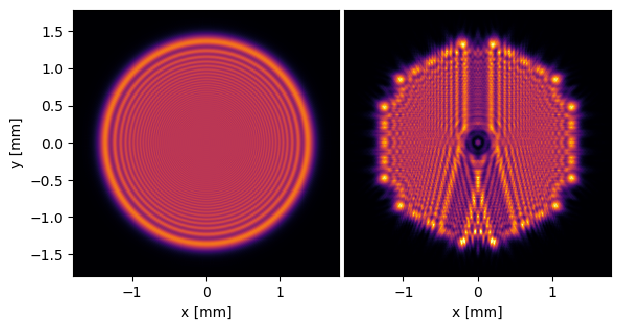

interactive(children=(FloatSlider(value=0.05, continuous_update=False, description='Distance [m]:', max=1.0, s…

<function __main__.fresnel_widget(pd=0.1, saveit=0)>

In [7]:
def fresnel_widget(pd=0.1,saveit=0): # pd is propagation distance in meters
    fresnel = FresnelPropagator(pupil_grid, pd)
    img_circ = fresnel(wf_circ)
    img_luvoir = fresnel(wf_luvoir)
    fig = double_plot(img_circ.intensity, img_luvoir.intensity,
            xlabel='x [mm]', ylabel='y [mm]',
            vmax=2, cmap='inferno', grid_units=1e-3)
    if saveit:
        plt.savefig("test.pdf")
        return
    plt.show()

widgets.interact(fresnel_widget,pd=w,saveit=1)
widgets.interact(fresnel_widget,pd=w)


In [8]:
w


FloatSlider(value=0.05, continuous_update=False, description='Distance [m]:', max=1.0, step=0.05)